# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading the dataset
df = pd.read_csv('kidney_disease.csv')
print(df.shape)
#showing first few rows of the dataset
df.head()

(400, 26)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Data Cleaning

In [3]:
df = df.drop(columns=['id'])

In [4]:
#checking missing values per feature
df.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

df2  = pd.DataFrame(mode.fit_transform(df))
df2.columns = df.columns
df2

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,99.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [7]:
df2.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

# Encoding

In [8]:
df2['classification'] = df2['classification'].apply(lambda x:'ckd' if x == 'ckd\t' else x)

In [9]:
df2['classification'] = df2['classification'].apply(lambda x:1 if x == 'ckd' else 0)

In [10]:
df2.classification.value_counts()

classification
1    250
0    150
Name: count, dtype: int64

In [11]:
df2.dtypes

age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification     int64
dtype: object

In [12]:
df.select_dtypes(exclude = ['object']).columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'], dtype='object')

In [13]:
for i in df.select_dtypes(exclude = ['object']).columns:
    df2[i] = df2[i].apply(lambda x: float(x))

In [14]:
df2.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification      int64
dtype: object

In [15]:
df2.select_dtypes(include = ['object']).columns

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [16]:
objList = df2.select_dtypes(include = "object").columns

#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df2[feat] = le.fit_transform(df2[feat].astype(str))

print (df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    int32  
 6   pc              400 non-null    int32  
 7   pcc             400 non-null    int32  
 8   ba              400 non-null    int32  
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int32  
 16  wc              400 non-null    int32  
 17  rc              400 non-null    int

In [17]:
df2.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,32,72,34,1,4,1,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,...,26,56,34,0,3,1,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,34,0,4,1,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,19,1,3,1,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,27,0,3,1,0,0,0,1


# Balancing the target variable

In [18]:
x0 = df2.drop('classification',axis='columns')
y0 = df2['classification']

In [19]:
y0.value_counts()

classification
1    250
0    150
Name: count, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm , y_sm = smote.fit_resample(x0,y0)

y_sm.value_counts()

classification
1    250
0    250
Name: count, dtype: int64

In [21]:
x_sm.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,32,72,34,1,4,1,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,...,11.3,26,56,34,0,3,1,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,19,70,34,0,4,1,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,20,62,19,1,3,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,23,68,27,0,3,1,0,0,0


# splitting train test data

In [22]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2,stratify=y_sm, random_state = 40)

## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
classification
0    200
1    200
Name: count, dtype: int64
Distribution of traget variable in test set
classification
0    50
1    50
Name: count, dtype: int64


# 2.Random forest Classifier

In [23]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
# Cross Validation

In [25]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

1.0

# Model Evaluation

In [26]:
y_predict_r = rf.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest (Untuned)',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest (Untuned),1.0,1.0,1.0,1.0,1.0,1.0


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_r))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# Feature Importance – Random Forest

<Axes: >

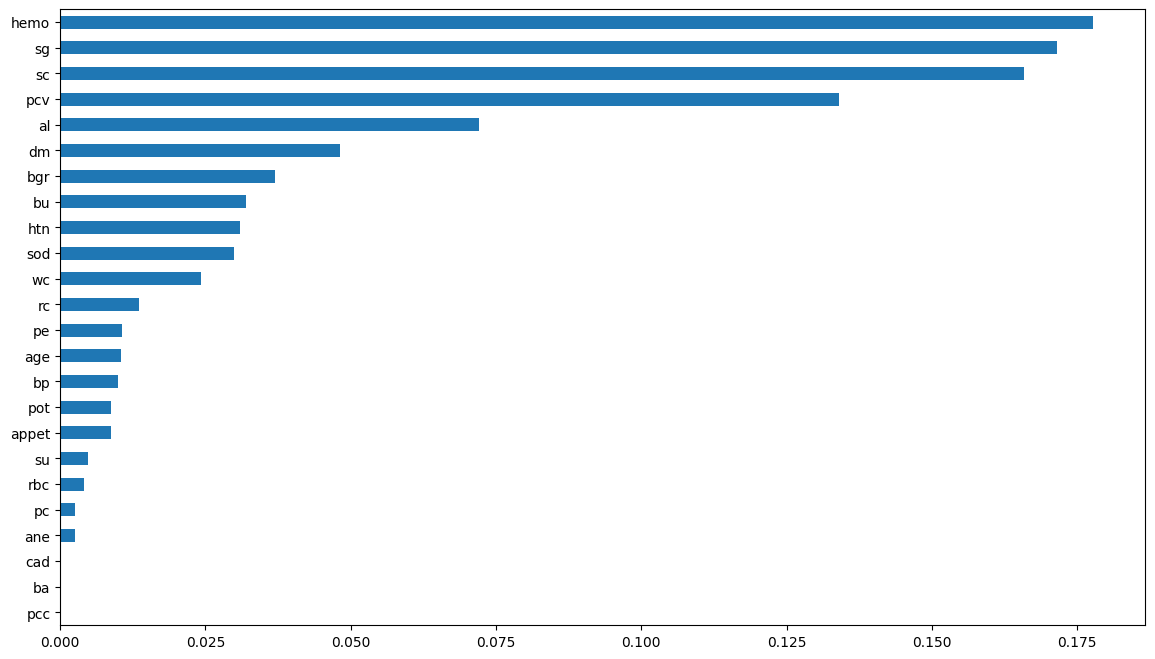

In [28]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(14, 8))

In [29]:
   #          bp		-	blood pressure
			# sg		-	specific gravity
			# al		-   	albumin
			# su		-	sugar
			# rbc		-	red blood cells
			# pc		-	pus cell
			# pcc		-	pus cell clumps
			# ba		-	bacteria
			# bgr		-	blood glucose random
			# bu		-	blood urea
			# sc		-	serum creatinine
			# sod		-	sodium
			# pot		-	potassium
			# hemo		-	hemoglobin
			# pcv		-	packed cell volume
			# wc		-	white blood cell count
			# rc		-	red blood cell count
			# htn		-	hypertension
			# dm		-	diabetes mellitus
			# cad		-	coronary artery disease
			# appet		-	appetite
			# pe		-	pedal edema
			# ane		-	anemia

In [30]:
# dropping less important features

In [55]:
input_data1 = x_sm.drop(['cad','ba','pcc','rbc','su','pe','ane','pc','pot','age','bp','appet','rc','wc','sod','bu'],axis=1)
input_data1

,sg,al,bgr,sc,hemo,pcv,htn,dm
0,1.020000,1.0,121.000000,1.200000,15.400000,32,1,4
1,1.020000,4.0,99.000000,0.800000,11.300000,26,0,3
2,1.010000,2.0,423.000000,1.800000,9.600000,19,0,4
3,1.005000,4.0,117.000000,3.800000,11.200000,20,1,3
4,1.010000,2.0,106.000000,1.400000,11.600000,23,0,3
...,...,...,...,...,...,...,...,...
495,1.022741,0.0,100.355352,0.864465,14.351254,32,0,3
496,1.025000,0.0,125.002552,1.199490,15.398043,31,0,3
497,1.025000,0.0,102.237024,0.500000,15.639412,31,0,3
498,1.024413,0.0,121.408083,0.835202,13.634680,31,0,3


In [56]:
# renaming columns
input_data1.columns = ['specific_gravity','albumin','blood_glucose_random','serum_creatinine','hemoglobin','packed_cell_volume','hypertension','diabetes mellitus']

In [57]:
input_data1.head()

,specific_gravity,albumin,blood_glucose_random,serum_creatinine,hemoglobin,packed_cell_volume,hypertension,diabetes mellitus
0,1.020,1.0,121.0,1.2,15.4,32,1,4
1,1.020,4.0,99.0,0.8,11.3,26,0,3
2,1.010,2.0,423.0,1.8,9.6,19,0,4
3,1.005,4.0,117.0,3.8,11.2,20,1,3
4,1.010,2.0,106.0,1.4,11.6,23,0,3


In [58]:
x = input_data1
y = y_sm

In [59]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify=y_sm, random_state = 40)

## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
classification
0    200
1    200
Name: count, dtype: int64
Distribution of traget variable in test set
classification
0    50
1    50
Name: count, dtype: int64


In [60]:
rf2 = RandomForestClassifier(criterion='gini',n_estimators=100)
rf2.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
model =rf2.fit(x_train,y_train)

In [62]:
# cross validation

In [63]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator = rf2, X = x_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

0.9974999999999999

In [64]:
y_predict_r = rf2.predict(x_test)

In [66]:
print(classification_report(y_test,y_predict_r))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



<Axes: >

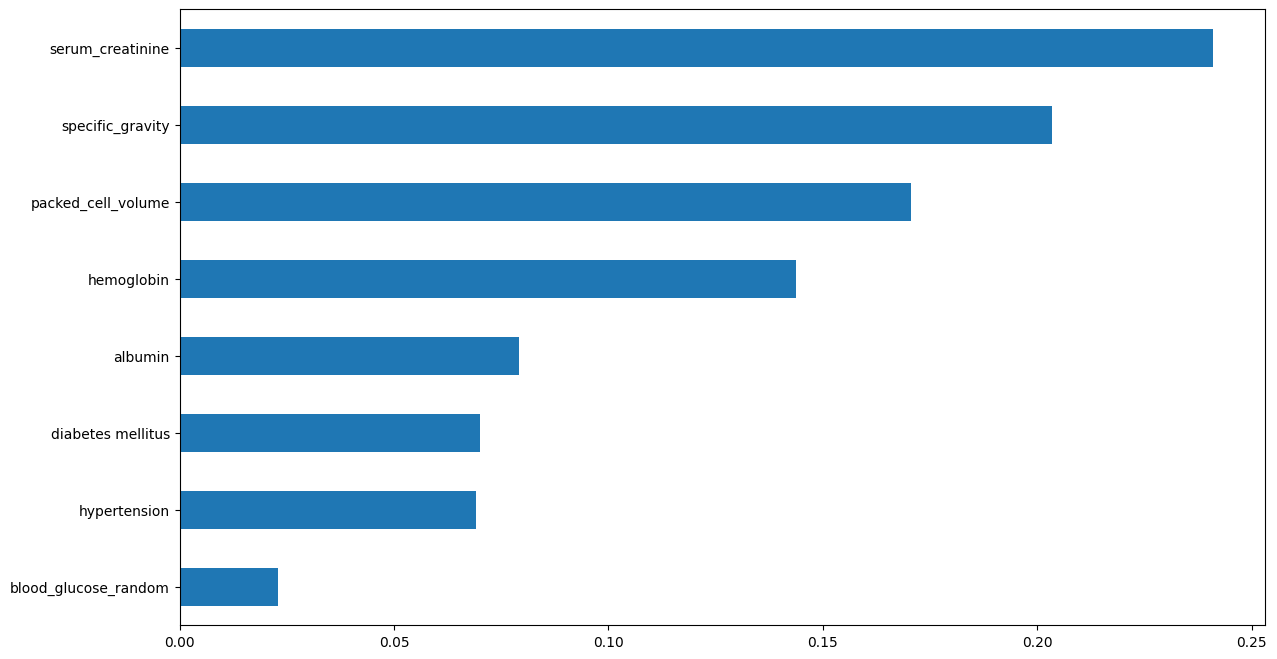

In [67]:
feat_importances = pd.Series(rf2.feature_importances_, index=x_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(14, 8))

# Confusion Matrix

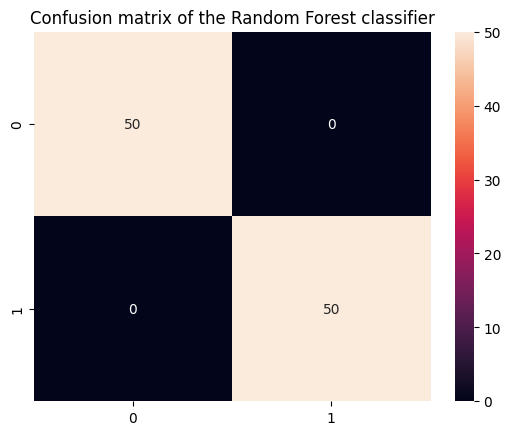

In [69]:
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_rf,annot=True,fmt="d")
plt.show()

# Exporting Model

In [70]:
import pickle
pickle.dump(model,open('kidneydisease.pkl','wb'))